# Netflix Data Cleaning, Analysis, and Visualization
### Author: Kiran Sumit Dalmiya¶





## Project Overview

This notebook walks through real-world data cleaning, exploratory data analysis, and visualization tasks using the Netflix dataset. 

The project demonstrates best practices in preparing data for meaningful insights and further machine learning applications.


## Step 1: Import Required Libraries

In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style for consistency
sns.set(style='whitegrid')


## Step 2: Load and Preview the Dataset

We'll start by loading the Netflix dataset, examining its structure, and getting a sense of the columns and sample records.


In [5]:
# Load the dataset (update the path if needed)
File_Path = r"C:\ML and AI\Unified Mentor Pvt. Ltd\Assignment 2 Netflix Data cleaning analysis and visualisation\netflix1.csv"
data = pd.read_csv(File_Path)

# Display the first few rows
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


The dataset contains these main columns:
- show_id: Unique identifier for the show.
- type: Whether the content is a Movie or TV Show.
- title: Title of the content.
- director: Name of the director(s).
- country: Countries of origin or release.
- date_added: Date when the title was added to Netflix.
- release_year: Year the content was initially released.
- rating: Certification or rating provided.
- duration: Duration (minutes or seasons).
- listed_in: Genre(s) associated.


## Step 3: Data Cleaning
 Check for missing values and duplicates

In [17]:
data.shape

(8790, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [11]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [13]:
# Check for missing values
print(data.isnull().sum())


show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


#### There is no Null values present in the dataset

In [15]:
print(f'Duplicates: {data.duplicated().sum()}')


Duplicates: 0


#### There is No Duplicate values present in the dataset

In [18]:

# If director or country are missing, drop those rows
data.dropna(subset=['director', 'country'], inplace=True)

In [19]:
data.shape

(8790, 10)

In [20]:
# Convert 'date_added' to datetime
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [24]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [21]:
# Re-check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [23]:
# Resetting the index after cleaning
data.reset_index(drop=True, inplace=True)

In [44]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

## Step 4: Exploratory Data Analysis (EDA)

Let's explore the cleaned Netflix dataset to answer key business questions. 

I'll visualize content distribution, genre patterns, trends over time, and other interesting patterns.


C:\Users\dalmi\AppData\Local\Temp\ipykernel_63556\3702781400.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='Set2',ax=axes[0])


Text(0.5, 0.98, 'Total Content on Netflix')

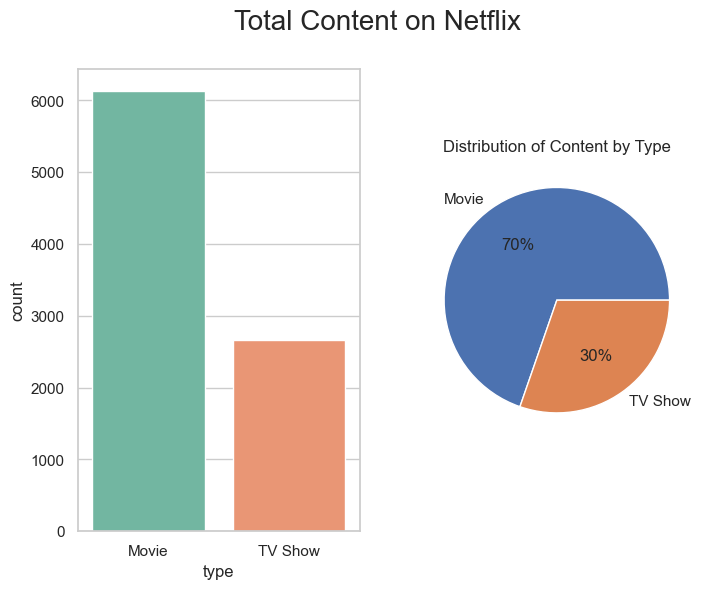

In [50]:
# Content Type Distribution: Movies vs TV Shows

freq=data['type'].value_counts()

fig, axes=plt.subplots(1,2, figsize=(8, 6))

plt.title('Distribution of Content by Type')
sns.countplot(x='type', data=data, palette='Set2',ax=axes[0])

plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)




C:\Users\dalmi\AppData\Local\Temp\ipykernel_63556\3295367454.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set3')


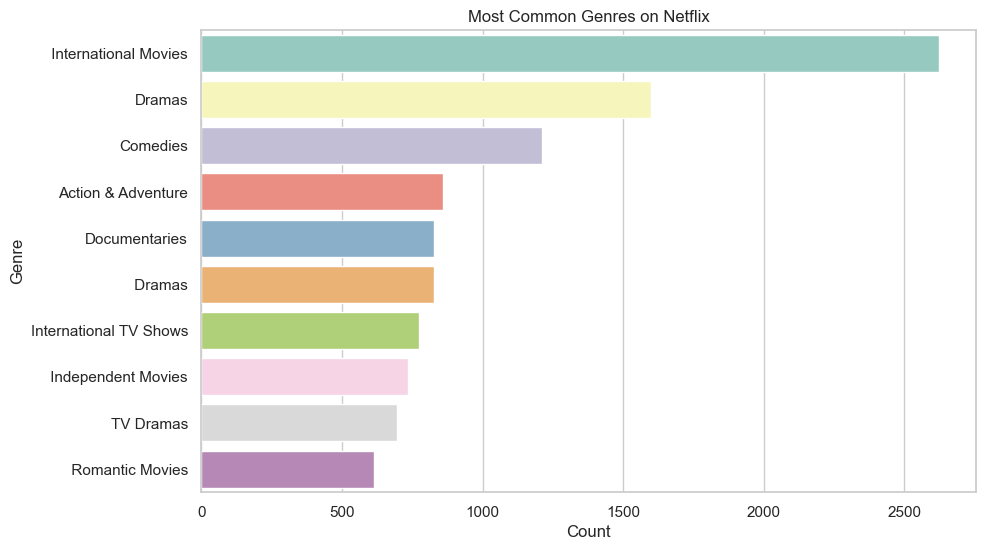

In [33]:
# Genre Distribution: Most common genres

# Split the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()



C:\Users\dalmi\AppData\Local\Temp\ipykernel_63556\1639091961.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=data, palette='coolwarm')


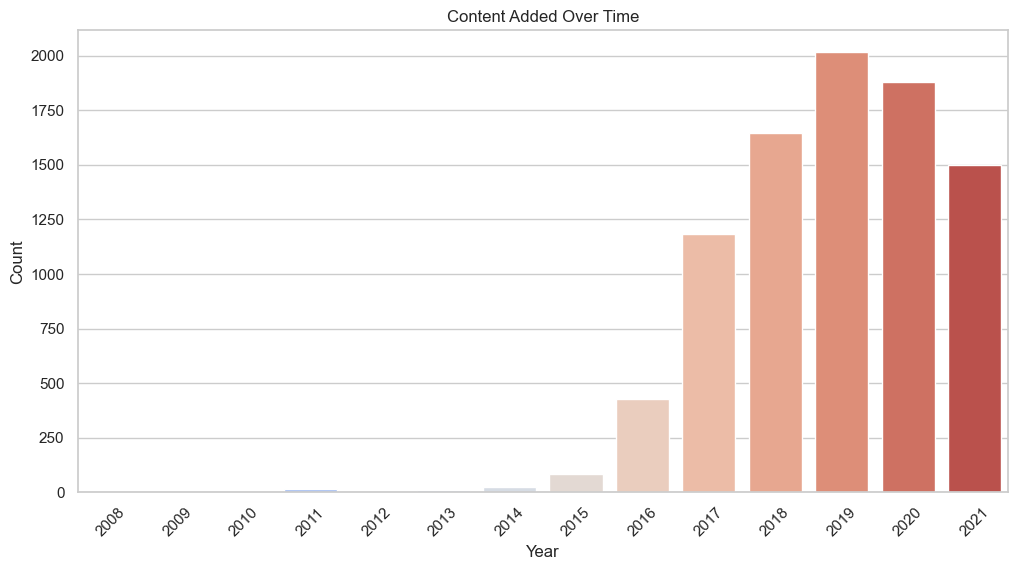

In [34]:

# Content Added Over Time
data['year_added'] = data['date_added'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\dalmi\AppData\Local\Temp\ipykernel_63556\2225350319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


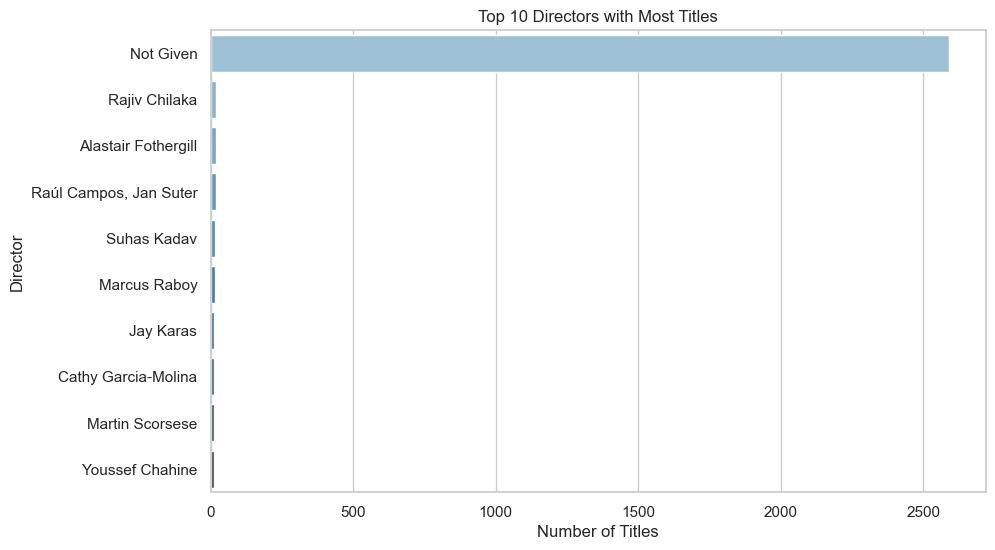

In [35]:
# Top 10 Directors by Number of Titles
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


In [40]:
top_directors

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: count, dtype: int64

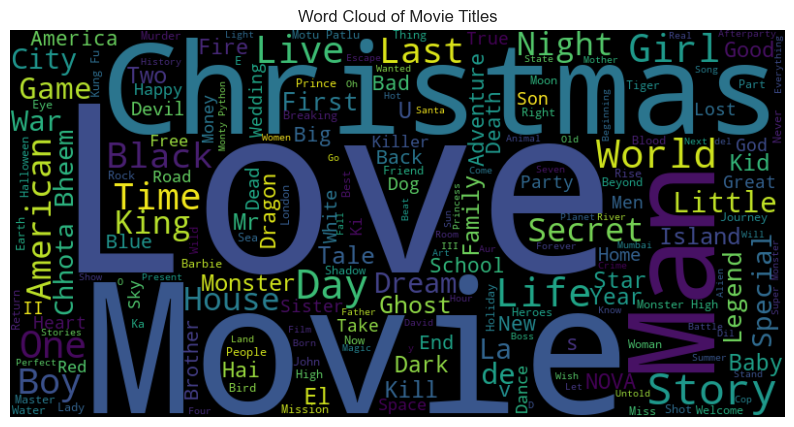

In [41]:
# Word Cloud: Popular Titles
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()


## Additional Insights

We'll further explore rating distributions and country-level patterns.


In [51]:
data['rating'].value_counts()


rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

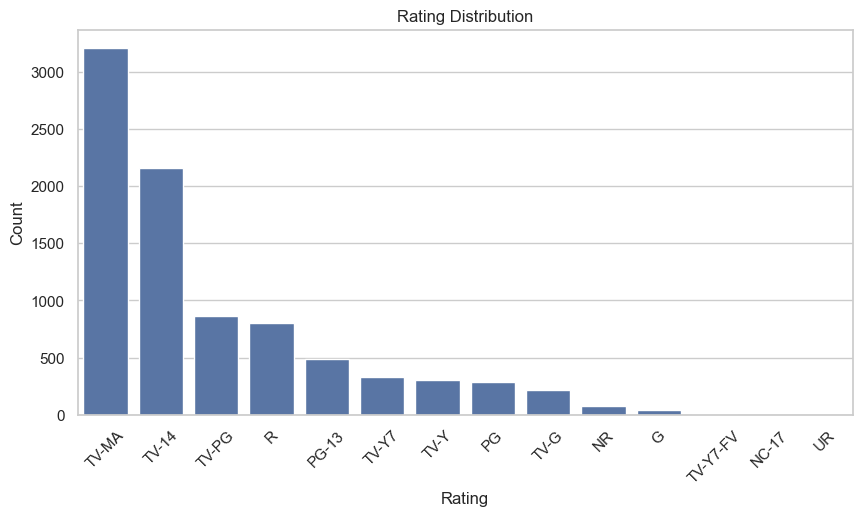

In [55]:
# Rating Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Text(0.5, 0.98, 'Ratings on Netflix')

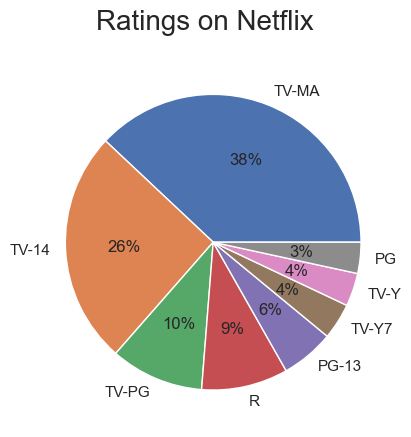

In [59]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)

plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.suptitle('Ratings on Netflix', fontsize=20)


In [60]:
data['country'].value_counts()


country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

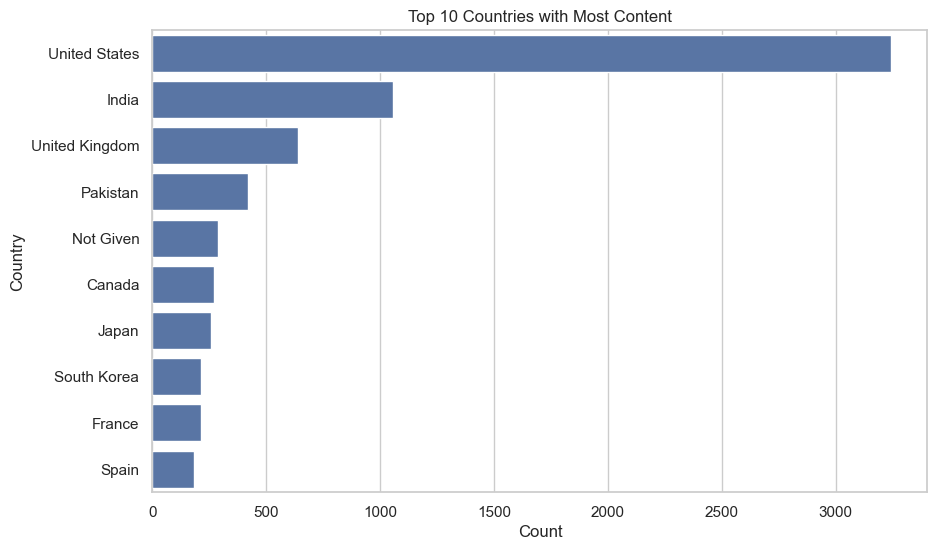

In [43]:
# Top 10 Countries by Content Count
top_countries = data['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


In [61]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

In [62]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,2021,9,25
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,2021,9,24
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,2021,9,24
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,2021,9,22
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,2021,9,24


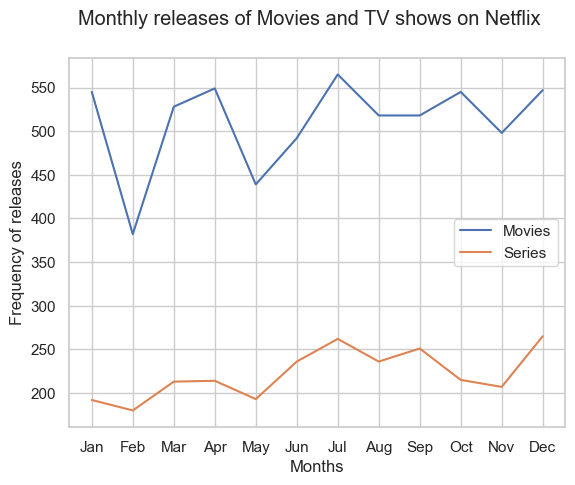

In [63]:
#Monthly releases of Movies and TV shows on Netflix

monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

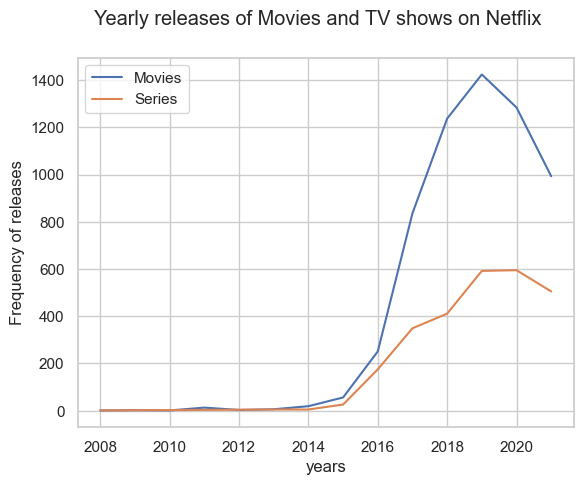

In [65]:
#Yearly releases of Movies and TV shows on Netflix

monthly_movie_release=data[data['type']=='Movie']['year'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values, label='Series')
plt.xlabel("years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.legend()
plt.suptitle("Yearly releases of Movies and TV shows on Netflix")
plt.show()

In [78]:
colors = plt.cm.viridis(np.linspace(0, 1, len(directors)))

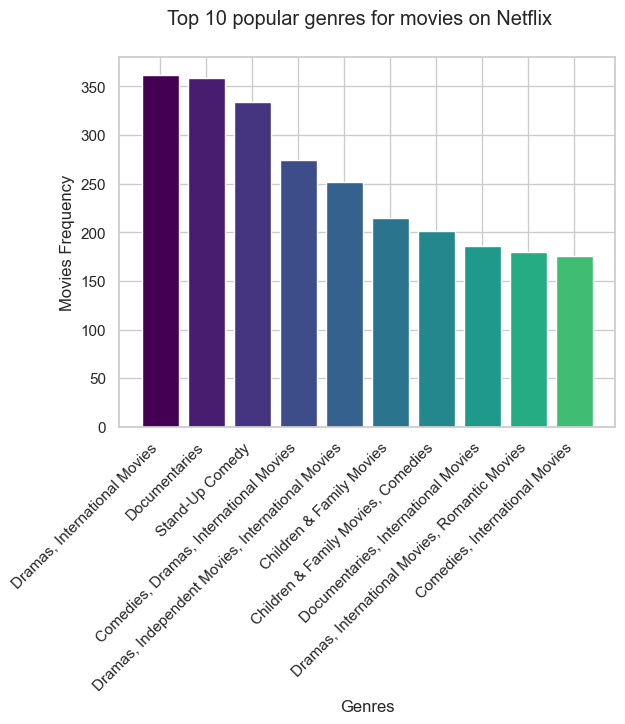

In [79]:
#Top 10 popular movie genres

popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]


plt.bar(popular_movie_genre.index, popular_movie_genre.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

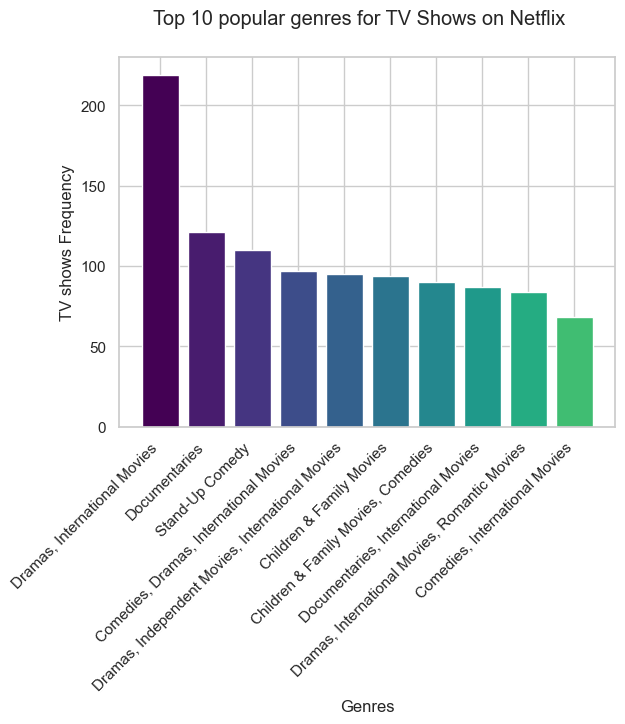

In [80]:
#Top 10 popular tv shows genres

popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]

plt.bar(popular_movie_genre.index, popular_series_genre.values,color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

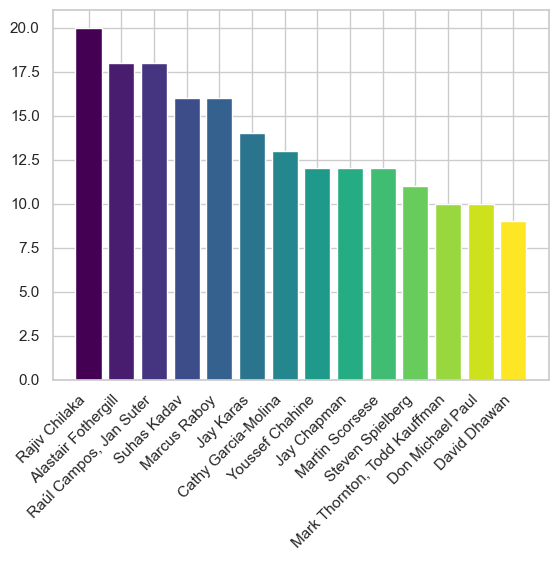

In [81]:
#Top 15 directors across Netflix with hoigh frequency of movies and shows
directors=data['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]
plt.bar(directors['director'], directors['count'],color=colors)
plt.xticks(rotation=45, ha='right')

## Step 5: Conclusions

This assignment demonstrated end-to-end data cleaning and analysis with real-world streaming data:
- Cleaned the Netflix dataset by handling missing values, removing duplicates, and converting types.
- Performed exploratory data analysis (EDA) and visualized major trends, genres, directors, ratings, and countries.
- Extracted useful insights for further machine learning applications or business strategies.

## Next Steps: 
Consider feature engineering (e.g. genre counts, duration extraction), 
building predictive models (recommendation, trend prediction), 
or interactive dashboarding using libraries such as Plotly, Tableau or PowerBI.
